<a href="https://colab.research.google.com/github/cdkontos/MSC-DWS-Machine-Learning-Course-Exercises/blob/main/Exercise_5_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from PIL import Image
import random

## Question 1

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Question 2

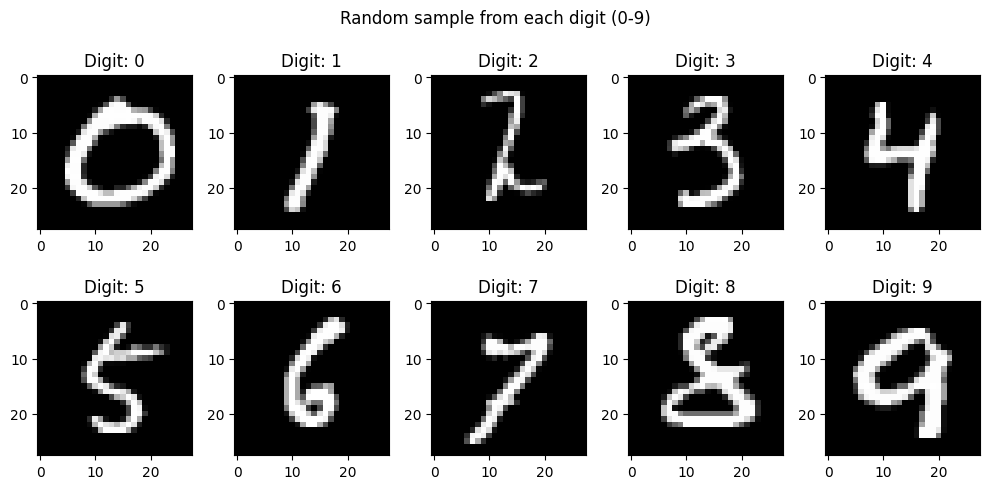

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle('Random sample from each digit (0-9)')

for i in range(10):
  indices = np.where(y_train == i)[0]
  random_index = random.choice(indices)
  row = i // 5
  col = i % 5
  axes[row, col].imshow(x_train[random_index], cmap='gray')
  axes[row, col].set_title(f'Digit: {i}')

plt.tight_layout()
plt.show()

## Question 3

Every picture has a size of 28x28 pixels as can be seen from the plot as well as the shape of the shape in Question 1. Not all pixels of the picture of a digit are as important, because for example the border pixels are all black and contain no relevant information as to what digit is being portrayed. Meanwhile, pixels near the middle of the picture are more important as they are what constitute the actual digit and provide information from their color and alpha.

## Question 4

In [4]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
x_train_flat.shape, x_test_flat.shape

((60000, 784), (10000, 784))

## Question 5

In [6]:
N = x_train_flat.shape[0]
k_values = [5, 15, 51, int(np.sqrt(N))+1]

train_accuracies = []
test_accuracies = []

for k in k_values:
  model_knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
  model_knn.fit(x_train_flat, y_train)
  y_pred_train = model_knn.predict(x_train_flat)
  y_pred_test = model_knn.predict(x_test_flat)

  train_accuracy = accuracy_score(y_train, y_pred_train)
  test_accuracy = accuracy_score(y_test, y_pred_test)

  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)

  print(f"K = {k}")
  print(f"Train Accuracy: {train_accuracy}")
  print(f"Test Accuracy: {test_accuracy}")
  print()

K = 5
Train Accuracy: 0.9819166666666667
Test Accuracy: 0.9688

K = 15
Train Accuracy: 0.971
Test Accuracy: 0.9633

K = 51
Train Accuracy: 0.9532333333333334
Test Accuracy: 0.9533

K = 245
Train Accuracy: 0.92095
Test Accuracy: 0.9238



### Line Plot

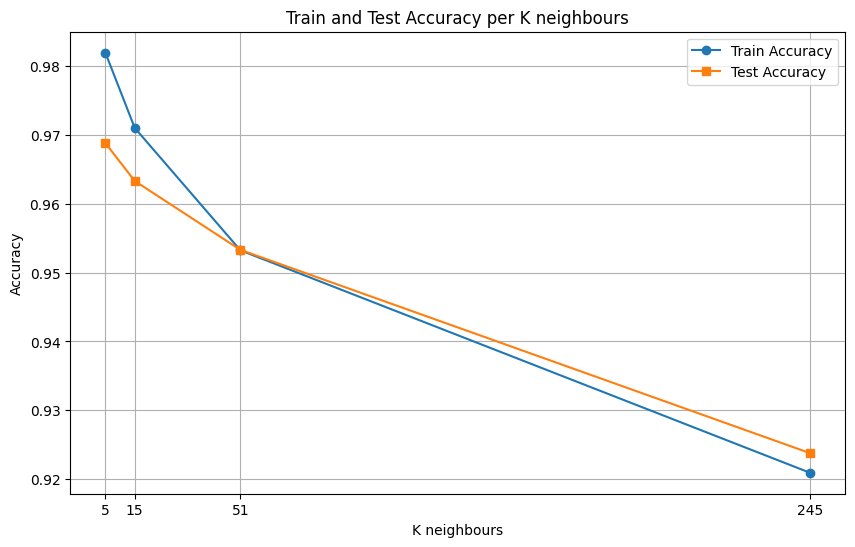

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(k_values, test_accuracies, marker='s', label='Test Accuracy')
plt.xlabel('K neighbours')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy per K neighbours')
plt.grid(True)
plt.xticks(k_values)
plt.legend()
plt.show()

## Question 6

In [8]:
x_train_norm = x_train_flat / 255.0
x_test_norm = x_test_flat / 255.0

x_train_norm.shape, x_test_norm.shape

((60000, 784), (10000, 784))

In [9]:
train_norm_accuracies = []
test_norm_accuracies = []

for k in k_values:
  model_knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
  model_knn.fit(x_train_norm, y_train)
  y_pred_train = model_knn.predict(x_train_norm)
  y_pred_test = model_knn.predict(x_test_norm)

  train_accuracy = accuracy_score(y_train, y_pred_train)
  test_accuracy = accuracy_score(y_test, y_pred_test)

  train_norm_accuracies.append(train_accuracy)
  test_norm_accuracies.append(test_accuracy)

  print(f"K = {k}")
  print(f"Train Accuracy: {train_accuracy}")
  print(f"Test Accuracy: {test_accuracy}")
  print()

K = 5
Train Accuracy: 0.9819166666666667
Test Accuracy: 0.9688

K = 15
Train Accuracy: 0.971
Test Accuracy: 0.9633

K = 51
Train Accuracy: 0.9532333333333334
Test Accuracy: 0.9533

K = 245
Train Accuracy: 0.92095
Test Accuracy: 0.9238



### Line PLot

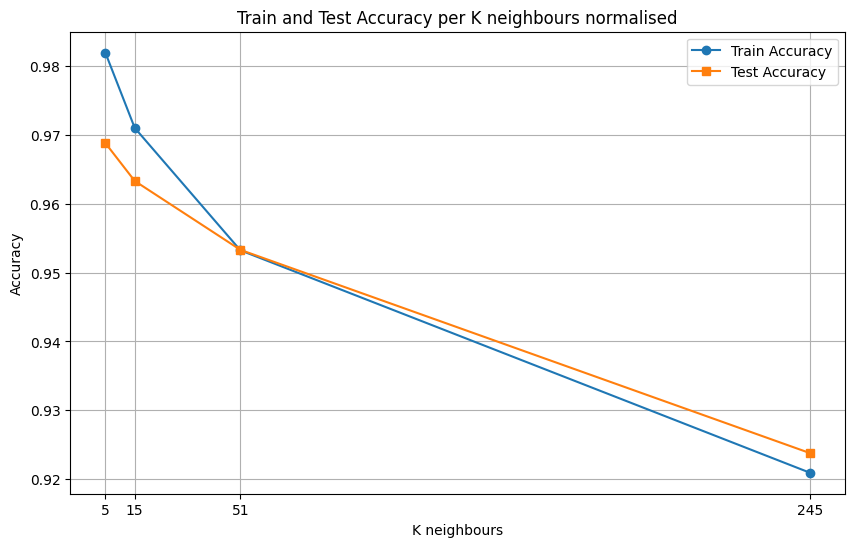

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_norm_accuracies, marker='o', label='Train Accuracy')
plt.plot(k_values, test_norm_accuracies, marker='s', label='Test Accuracy')
plt.xlabel('K neighbours')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy per K neighbours normalised')
plt.grid(True)
plt.xticks(k_values)
plt.legend()
plt.show()

The accuracy values remain the same between normalised and non-normalised values which is expected, as the KNN algorithm calculates the Euclidean distance between points. As the data set is divided by the same factor of 255 all the relative distances between points stay the same and as such the algorithm will pick the same neighbours as before the division, thus creating the same predictions and accuracy.

## Question 7

In [13]:
best_model_knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
best_model_knn.fit(x_train_norm, y_train)

KNeighborsClassifier(n_jobs=-1)

### Load Image

In [19]:
image = Image.open("drawing.png").convert('L')

### Array Conversion

In [20]:
image_array = np.array(image)
image_array.shape

(28, 28)

### Image Plot

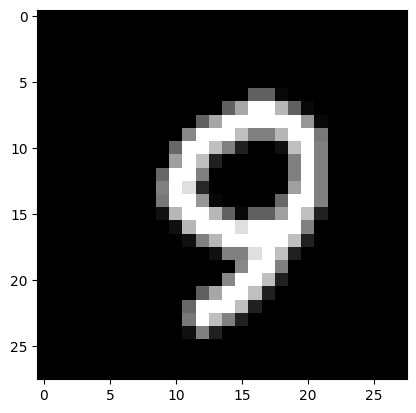

In [21]:
plt.imshow(image_array, cmap='gray')
plt.show()

### Prediction

In [22]:
image_flat = image_array.reshape(1, -1) / 255.0
image_pred = best_model_knn.predict(image_flat)
print(f"Predicted digit: {image_pred[0]}")

Predicted digit: 9
